# 1. Importance Sampling


In [326]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


mean = np.array([0,0])
cov = [[0.2, 0],
       [0,0.2]]

N = 1000
p = 0.5

def ground_truth(r): #area of a 0.5-ball with radius r
    return ((r**2)/2-4/3*(r**(3/2))+r)*4

def bivariate_normal_pdf(pair, mean, cov):
    cov_det = np.linalg.det(cov)
    normalizer = 1.0/((2*np.pi)*(np.sqrt(cov_det)))
    matrix = math.pow(np.e, ((-1/2)*(np.matrix(pair-mean))*np.linalg.inv(cov)*np.transpose(np.matrix(pair-mean))))
    #print(matrix)
    return normalizer*matrix

def weight(x,y,p):
    if abs(x)**p + abs(y)**p <=1:
        return 1/bivariate_normal_pdf([x,y], mean, cov)
    else:
        return 0


xi, yi = np.random.multivariate_normal(mean, cov, N).T

totalWeight = 0

for i in range(N):
    totalWeight += weight(xi[i],yi[i],p)
    
area = totalWeight/N
ground_truth = ground_truth(1.0)
#plt.plot(lp_est,'.b')

print('Ground Truth :', ground_truth)
print('IS Estimator :', area)



Ground Truth : 0.666666666666667
IS Estimator : 0.644450635849


# 2. Markov Chain

## Part a

In [354]:
M = np.array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
              [0, 0.25, 0, 0, 0.25, 0],
              [0, 0, 0, 0.5, 0, 0],
              [0.25, 0.25, 0.5, 0, 0.25, 0.25],
              [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
              [0.25, 0, 0, 0, 0, 0.25]])

M.shape

(6, 6)

## Part b

In [355]:
w, v = np.linalg.eig(M)
i = np.argmax(np.isclose(w, 1.0))
eig = v[:, i]
v = np.real(eig / sum(eig))

print(v)


[ 0.25        0.08333333  0.11111111  0.22222222  0.25        0.08333333]


## Part c

In [356]:
A = M*v
np.allclose(A,A.T)

False

## Part d

In [318]:
eps = 1e-8
curr = np.array([1, 0, 0, 0, 0, 0])
t_mix = 0
variation = np.sum(np.abs(v-curr))

while variation > eps:
    curr = np.dot(M, curr)
    variation = 0.5*np.sum(np.abs(v-curr))
    t_mix += 1

print(t_mix)

    

24


## Part e

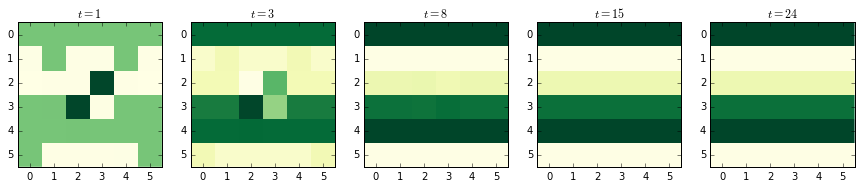

In [319]:
time = [1,3,8,15,t_mix]
f, subplot = plt.subplots(1, len(time), figsize=(15,10))
for i in range(len(time)):
    subplot[i].imshow(np.linalg.matrix_power(M,time[i]), aspect='equal', interpolation='none', cmap='YlGn')
    subplot[i].set_title("$t= %d$" % time[i])
    subplot[i].grid(False)

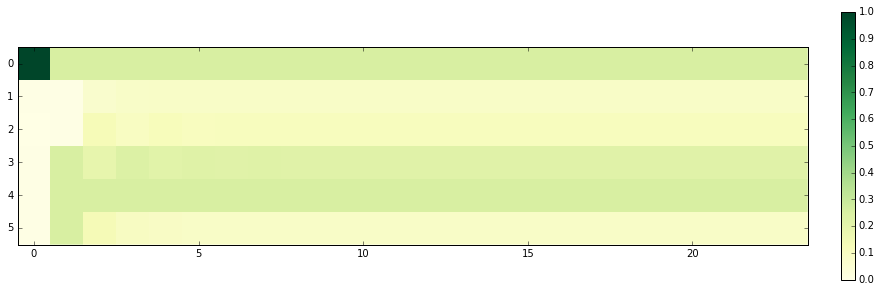

In [349]:

temp = A
M_new = np.zeros((len(M),t_mix))

states = np.zeros([6, t_mix])
states[:, 0] = np.array([1,0,0,0,0,0])


for i in range (1,t_mix):
    states[:,i] = np.dot(M,states[:,i-1])

plt.figure(figsize=(15,10))
im = plt.imshow(states, aspect='equal', interpolation='none', cmap='YlGn')
plt.colorbar(im,fraction=0.016, pad=0.04)